# PHREEQC Model Plotting
This notebook will plot your PHREEQC results along with your data for your adsorption and complexation experiment. You will need to upload the analyzed adsorption data and the selected output from both models file from PHREEQC. 


### Start this notebook by uploading your analyzed adsorption data and selected output file from PHREEQC.
* Replace `df_example1.csv` with the filename of your adsorption experiment data
* Replace `df_example2.csv` with the filename of your complexation experiment data
* Replace `selected_example1.sel` with the filename of the selected output of your adsorption experiment modeling
* Replace `selected_example2.sel` with the filename of the selected output of your complexation experiment modeling

In [79]:
data_exp1 = "bacteria_data1.csv"
data_exp2 = "df_example2.csv"
model1 = "exp1_output_1.sel"
model2 = "exp2_output_1.sel"

In [80]:
# import the pandas module to store data in a dataframe
import pandas as pd

# upload your original experimental data
df1 = pd.read_csv(data_exp1)
# This will automatically remove data that is below pH 4.5 or above pH9.5
df2 = df1[(df1['pH'] >= 4.5) & (df1['pH'] <= 9.5)][['pH', 'sampconc']]
# This will sort the data in ascending order based on pH
df2.sort_values("pH", inplace=True)
# This will calculate Zn adsorption as a percentage of the total Zn concentration
df2['Znadsper'] = (1 - (df2['sampconc'] / 5)) * 100
# This will replace negative values of Znadsper with 0
df2['Znadsper'] = df2['Znadsper'].clip(lower=0)
# This will replace Znadsper values greater than 100 with 100
df2['Znadsper'] = df2['Znadsper'].clip(upper=100)
# upload the data from your alternate experiment
df3 = pd.read_csv(data_exp2)
# This will automatically remove data that is below pH 4.5 or above pH9.5
df4 = df3[(df3['pH'] >= 4.5) & (df3['pH'] <= 9.5)][['pH', 'sampconc']]
# This will sort the data in ascending order based on pH
df4.sort_values("pH", inplace=True)
# This will calculate Zn adsorption as a percentage of the total Zn concentration
df4['Znadsper'] = (1 - (df4['sampconc'] / 5)) * 100
# This will replace negative values of Znadsper with 0
df4['Znadsper'] = df4['Znadsper'].clip(lower=0)
# This will replace Znadsper values greater than 100 with 100
df4['Znadsper'] = df4['Znadsper'].clip(upper=100)

# load the original selected output into a dataframe and specify that the data are separated by tabs
# the filename needs to match exactly the file uploaded in the previous cell
mod = pd.read_csv(model1, sep="\t")
# get rid of the first row data (see comment above about why)
mod.drop([0], inplace=True)
mod.drop([1], inplace=True)
# get rid of extraneous whitespaces in the column headers
mod = mod.rename(columns=lambda x: x.strip())
# sort the data in acending order based on pH
mod.sort_values("pH", inplace=True)

# load the alternate experiment selected output into a dataframe
mod2 = pd.read_csv(model2, sep="\t")
# get rid of the first row data (see comment above about why)
mod2.drop([0], inplace=True)
mod2.drop([1], inplace=True)
# get rid of extraneous whitespaces in the column headers
mod2 = mod2.rename(columns=lambda x: x.strip())
# sort the data in acending order based on pH
mod2.sort_values("pH", inplace=True)


### We need to sum Zn adsorbed onto each surface site at each pH value in order to calculate total Zn adsorbed.

In [81]:
# Convert the total Zn used in the experiments from ppm to molality
znm = 5 / 65380
# sum the Zn adsorbed on the strong and weak surface sites at each pH value
modznads = mod["m_BactaOZn+"] + mod["m_BactbOZn+"] + mod["m_BactcOZn+"]
# calculate total zn adsorbed as a percent
modsper = (modznads / znm) * 100
# calcuate Zn adsorbed on the strong and weak site as percents
sitea = mod["m_BactaOZn+"] / znm * 100
siteb = mod["m_BactbOZn+"] / znm * 100
sitec = mod["m_BactcOZn+"] / znm * 100

# Convert the total Zn used in the experiments from ppm to molality
znm2 = 5 / 65380
# sum the Zn adsorbed on the strong and weak surface sites at each pH value
modznads2 = mod2["m_BactaOZn+"] + mod2["m_BactbOZn+"] + mod2["m_BactcOZn+"]
# calculate total zn adsorbed as a percent
modsper2 = (modznads2 / znm2) * 100
# calcuate Zn adsorbed on the strong and weak site as percents
sitea2 = mod2["m_BactaOZn+"] / znm2 * 100
siteb2 = mod2["m_BactbOZn+"] / znm2 * 100
sitec2 = mod2["m_BactcOZn+"] / znm2 * 100


### Now we can plot the experimental data and model result on the same plot. We can also add the predicted speciation of the Zn surface species.

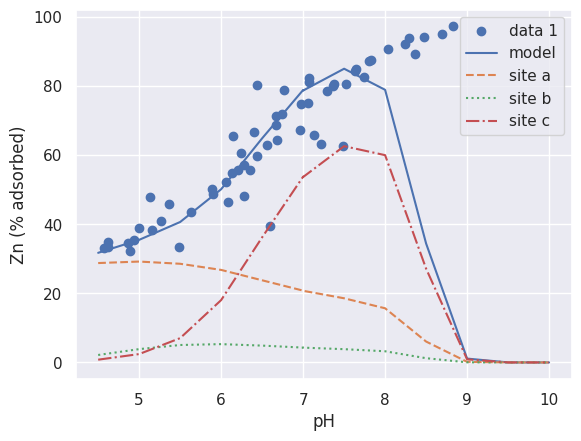

In [82]:
# I'll need to import a some modules for the plotting and downloading the plot.
import matplotlib.pyplot as plt

# to make the plots look nicer we will import the seaborn module
import seaborn as sns

sns.set_theme()

plt.figure()
# I'll plot the data as points and the model as a line
plt.scatter(df2["pH"], df2["Znadsper"], label="data 1")
plt.plot(mod["pH"], modsper, label="model")
plt.plot(mod["pH"], sitea, label="site a", linestyle="--")
plt.plot(mod["pH"], siteb, label="site b", linestyle=":")
plt.plot(mod["pH"], sitec, label="site c", linestyle="-.")
# Label the x and y axes
plt.xlabel("pH")
plt.ylabel("Zn (% adsorbed)")

# Add a legend to the plot
plt.legend()

# Save and download the plot as pdf and png file
plt.savefig("zn_bact_mod1.pdf")



# Plotting complexation modeling result and data

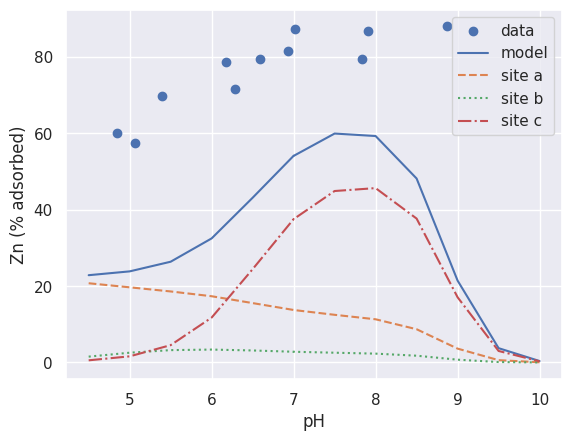

In [83]:
# Plot the complexation experiment data and the PHREEQC model
plt.figure()
# I'll plot the data as points and the model as a line
plt.scatter(df4["pH"], df4["Znadsper"], label="data")
plt.plot(mod2["pH"], modsper2, label="model")
plt.plot(mod2["pH"], sitea2, label="site a", linestyle="--")
plt.plot(mod2["pH"], siteb2, label="site b", linestyle=":")
plt.plot(mod2["pH"], sitec2, label="site c", linestyle="-.")
# Label the x and y axes
plt.xlabel("pH")
plt.ylabel("Zn (% adsorbed)")

# Add a legend to the plot
plt.legend()

# Save and download the plot as pdf and png file
plt.savefig("zn_bact_mod2.pdf")

# Plot both experiments together with their PHREEQC modeling results

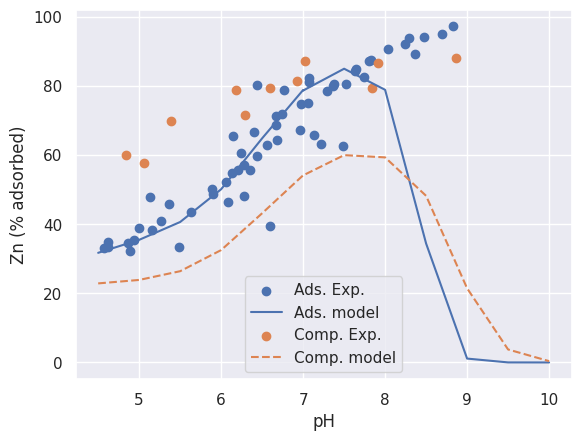

In [84]:
plt.figure()
# I'll plot the data as points and the model as a line
plt.scatter(df2["pH"], df2["Znadsper"], label="Ads. Exp.")
plt.plot(mod["pH"], modsper, label="Ads. model")

plt.scatter(df4["pH"], df4["Znadsper"], label="Comp. Exp.")
plt.plot(mod2["pH"], modsper2, linestyle="--", label="Comp. model")
# Label the x and y axes
plt.xlabel("pH")
plt.ylabel("Zn (% adsorbed)")

# Add a legend to the plot
plt.legend()

# Save and download the plot as pdf and png file
plt.savefig("zn_bact_mod3.pdf")
